# Case Study Breast Cancer
Let's prepare a step-by-step tutorial for the Logistic Regression algorithm using the Breast Cancer dataset. We'll demonstrate how the Logistic Regression algorithm works for classification and visualize the accuracy vs hyperparameter for comparison.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)

## Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = pd.Series(data.target)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Create and train the Logistic Regression model with different regularization parameters (C).

In [2]:
# Create a list of regularization parameter values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create an empty dictionary to store the results
results = {}

# Train Logistic Regression models with different C values
for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42, max_iter=2000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = {
        'model': lr_model,
        'accuracy': accuracy
    }


## Print the results of the classification.

In [3]:
# Print the results of the classification
print("Results of Logistic Regression Classification:")
for C, result in results.items():
    print(f"C = {C}, Accuracy: {result['accuracy']:.4f}")


Results of Logistic Regression Classification:
C = 0.001, Accuracy: 0.8860
C = 0.01, Accuracy: 0.9649
C = 0.1, Accuracy: 0.9825
C = 1, Accuracy: 0.9737
C = 10, Accuracy: 0.9737
C = 100, Accuracy: 0.9386
C = 1000, Accuracy: 0.9386


## Visualize the accuracy vs regularization parameter (C) for comparison.

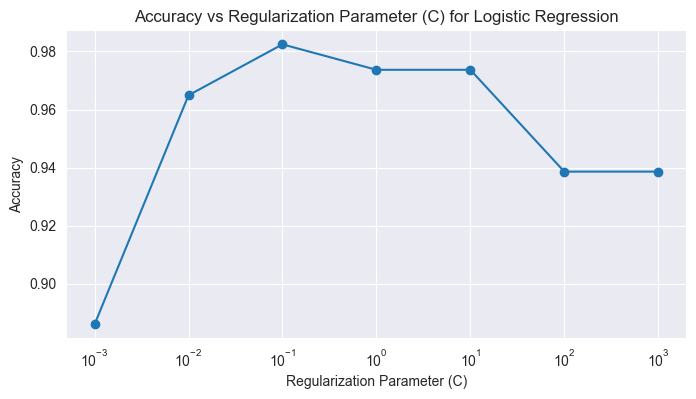

In [4]:
# Visualize the accuracy vs regularization parameter (C)
accuracies = [result['accuracy'] for C, result in results.items()]

plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter (C) for Logistic Regression')
plt.grid(True)
plt.show()

## Conclusion
This tutorial covers the Logistic Regression algorithm using the Breast Cancer dataset. It demonstrates how to create and train the Logistic Regression model for classification and prints the accuracy of the model with different values of the regularization parameter (C). The tutorial also visualizes the accuracy vs regularization parameter (C) for comparison.

Feel free to experiment with different values of C to observe how it affects the model's performance.